<a href="https://colab.research.google.com/github/rohitrv8922/Bike-Sharing-Demand-Prediction/blob/main/ROHIT_VERMA_(Bike_Sharing_Demand_Prediction_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Modules**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

**Loading the Dataset into Google Colab**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Loading Dataset

In [4]:
df='/content/drive/My Drive/'
bike_data=pd.read_csv(df +'SeoulBikeData.csv',encoding='latin-1')

**This dataframe presents the rented bike count in this city of Seoul. It is presented as a time series which presents the data with a step of an hour.**

For each hour, the dataframe mainly presents weather conditions and information about the day.

In [5]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#Step 1 : Exploratory Data Analysis and Preprocessing

In [7]:
bike_data.shape

(8760, 14)

**We mainly have numeric values, datetime and str**

In [8]:
bike_data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**Here is the statitical description of the features**

In [9]:
bike_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Checking Null Values in our Dataset**

In [10]:
bike_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

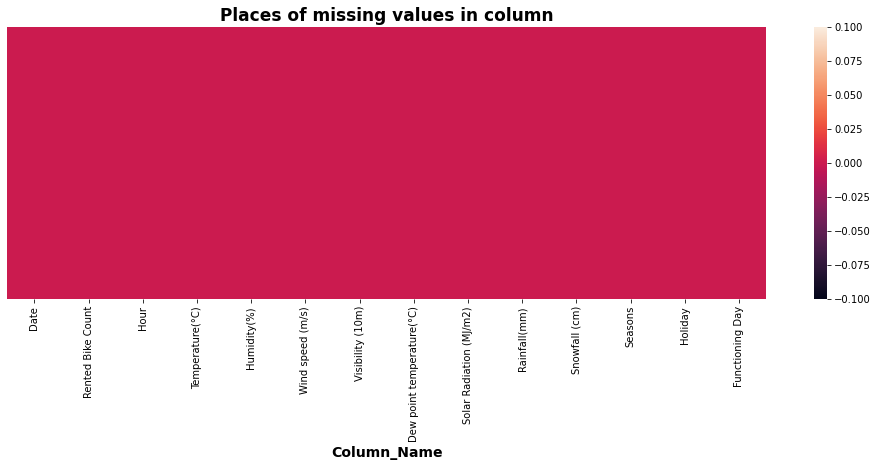

In [11]:
# No missin Values in our dataset
plt.figure(figsize=(17, 5))
sns.heatmap(bike_data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

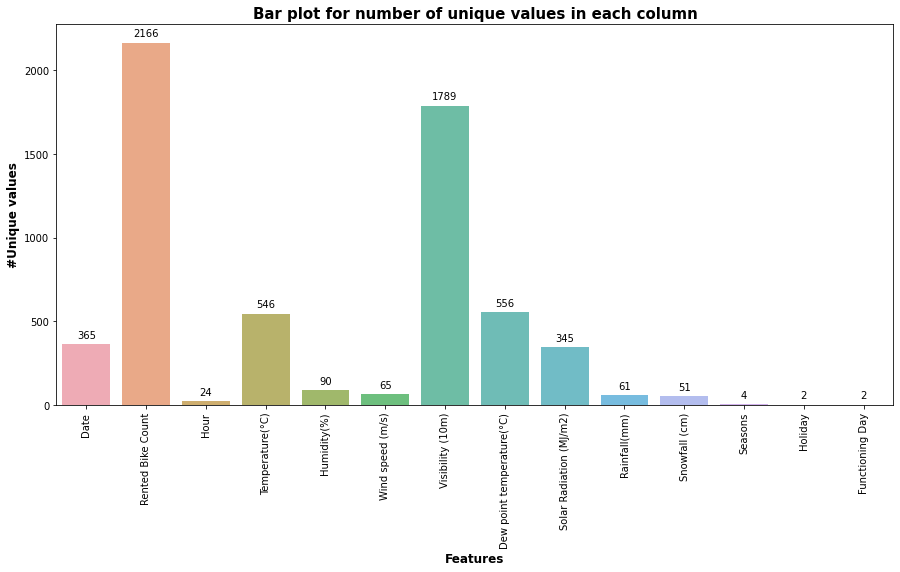

In [12]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = bike_data.columns
unique=[]
for i in bike_data.columns:
    unique.append(bike_data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

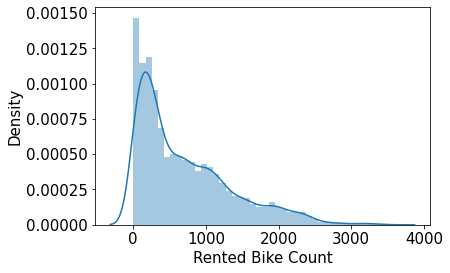

In [13]:
plt.rc('font', size=15) # Set font size to 15
sns.distplot(bike_data['Rented Bike Count']);

We convert as datetime the series 'Date'

In [14]:
# Date columns to Date format conversion

bike_data['Date']= pd.to_datetime(bike_data['Date'])

In [15]:
# extracting day,month, day of week and weekdays/weekend from date column

bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Month'] = bike_data['Date'].apply(lambda x : x.month)
bike_data['WeekDay'] = bike_data['Date'].dt.day_name()
bike_data['weekdays_weekend']=bike_data['WeekDay'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_data=bike_data.drop(columns=['Date','WeekDay'],axis=1)

#Here are the correlations between variables

**We can see that on the target variable line the most correlated variables to the rent are**
1. the hour
2. the temperature
3. the dew point temperature
4. the solar radiation
(The dew point is a temperature which is so cold that the vapor becomes liquid)

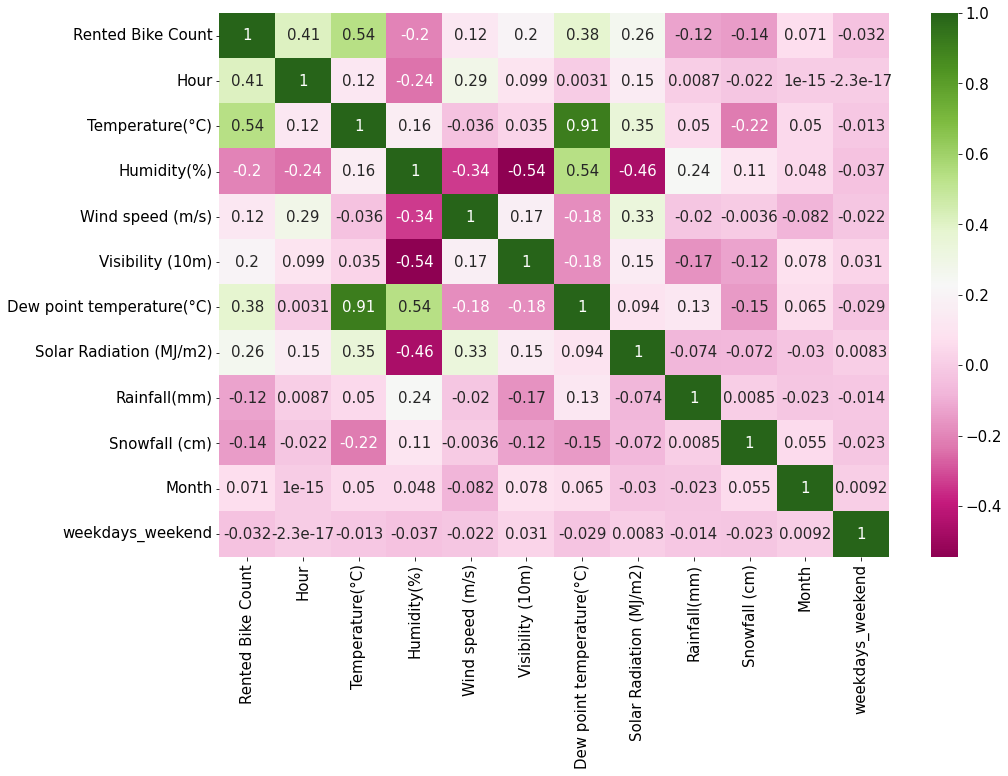

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_data.corr(),
            cmap='PiYG',
            annot=True)

In [17]:
nan_values=bike_data.isna()
nan_columns=nan_values.any()


columns_with_nan=bike_data.columns[nan_columns].tolist()
columns_with_nan

[]

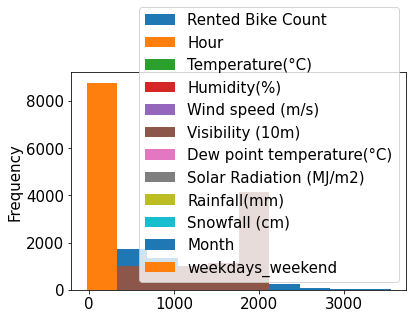

In [18]:
bike_data.plot.hist(by=None, bins=10)

In [19]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)' so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.

In [20]:
bike_data=bike_data.drop(['Dew point temperature(°C)'],axis=1)

**This is the list of sorted correlation of variables to the target**

In [21]:
df1Corr=pd.DataFrame(bike_data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Month,0.070861
weekdays_weekend,-0.032259
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


#Step 2 : Data Preparation and data Visualisation using Matplotlib and seaborn

**Creating variables**

Variable which informs us if it is night or day

In [22]:
bike_data['label_day_night']=bike_data['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

**Plotting variables to the target**

According to this boxplot there are much more rents during the day than the night

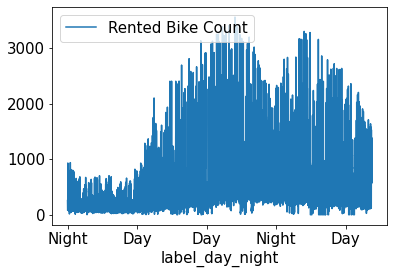

In [23]:
bike_data.plot(x='label_day_night',y='Rented Bike Count',kind='line')

On this plot, we see a high raise between April to autumn of bikes rent

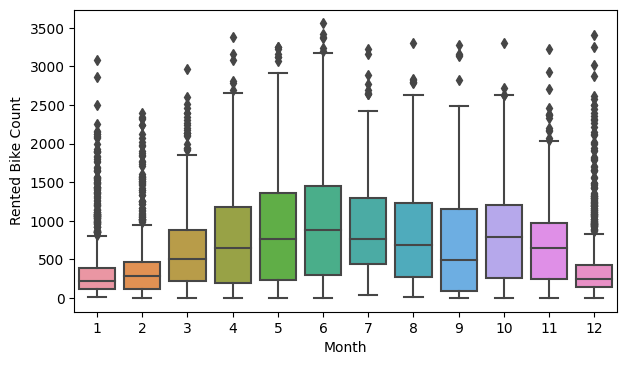

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='Month',y='Rented Bike Count',data=bike_data)
plt.show()

Conclusion:

We can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

Also demand of bike is maximum during May,june,july i.e Summer seasons

**So let's focus on the seasons where we have the most rents**

We can see that as we expected, summer is the season in which we have the most rents.
Let's try to understand why summer is the season with the most rents

In [ ]:
df1VizSeasons=pd.DataFrame(bike_data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


**Let's verify that it is linked to the solar Radiation
This plot explains the high correlation with the feature 'solar Radiation' and 'Summer'**

In [ ]:
df1VizSolarRadiation=pd.DataFrame(bike_data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


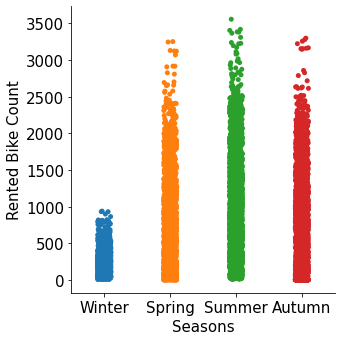

In [ ]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=bike_data)

Conclusion

We can clearly see that there is less demand of rented bike during winter season








**Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**

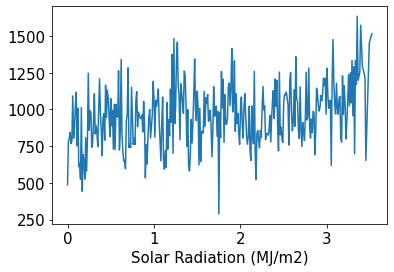

In [ ]:
bike_data.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

**Here we have a repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by bikes**

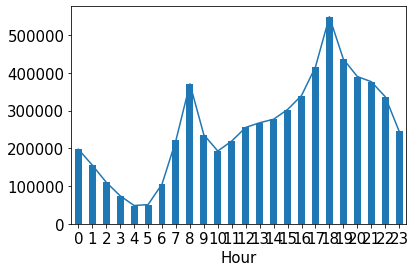

In [ ]:
bike_data.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
bike_data.groupby('Hour').sum()['Rented Bike Count'].plot()

**Days with highest rented bike are week days**

So we suppose people rent bikes to go to work or school

**Korean people like to ride bikes when it is pretty hot around 25°C in average**

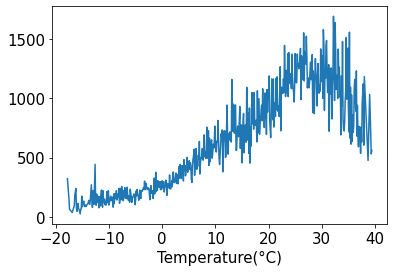

In [ ]:
bike_data.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

Let's see the repartition of the rents following the moment of the day




In [ ]:
# Numeric Features

numeric_features= bike_data.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Month                    8760 non-null   int64  
 10  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 752.9 KB


In [ ]:
# describing numeric feature

numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80
Month,8760.0,6.526027,3.448048,1.0,4.00,7.00,10.00,12.00


In [ ]:
#Extracting categorical features
categorical_features= bike_data.select_dtypes(include='object')

In [ ]:
categorical_features

,Seasons,Holiday,Functioning Day,label_day_night
0,Winter,No Holiday,Yes,Night
1,Winter,No Holiday,Yes,Night
2,Winter,No Holiday,Yes,Night
3,Winter,No Holiday,Yes,Night
4,Winter,No Holiday,Yes,Night
...,...,...,...,...
8755,Autumn,No Holiday,Yes,Day
8756,Autumn,No Holiday,Yes,Day
8757,Autumn,No Holiday,Yes,Night
8758,Autumn,No Holiday,Yes,Night


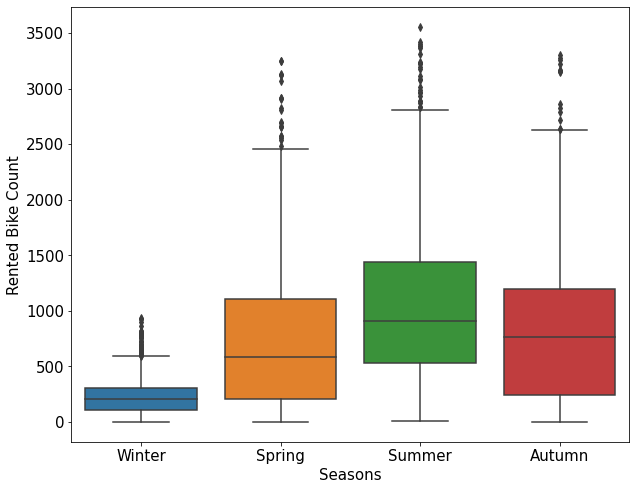

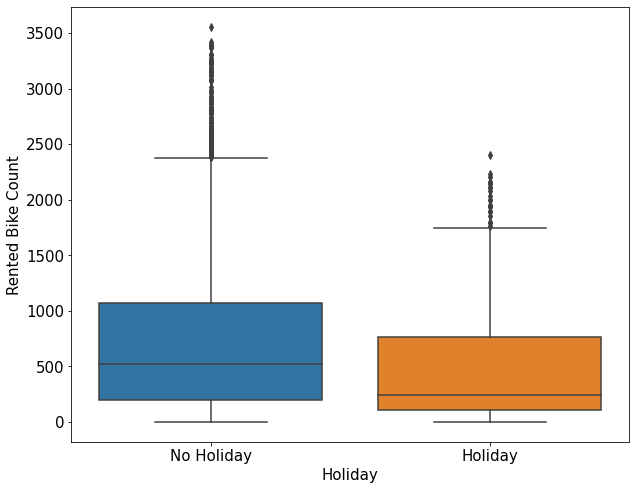

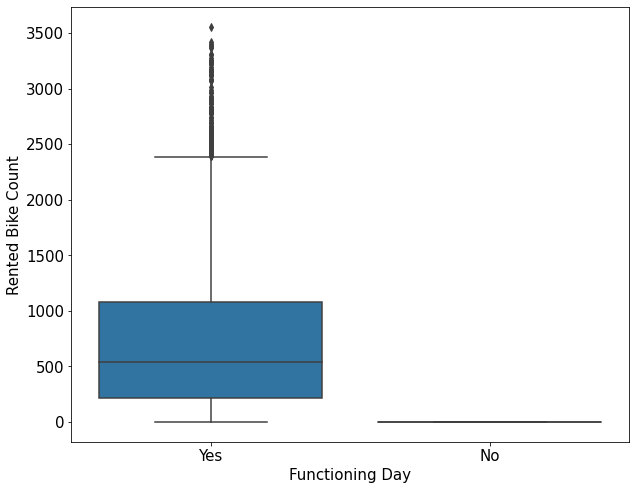

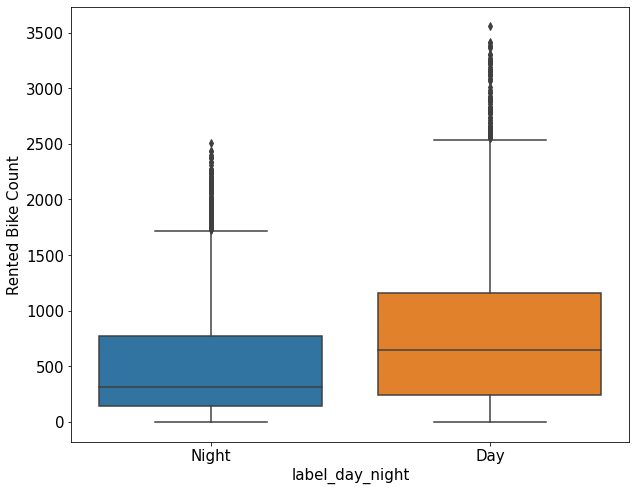

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bike_data[col],y=bike_data["Rented Bike Count"])
  plt.show()

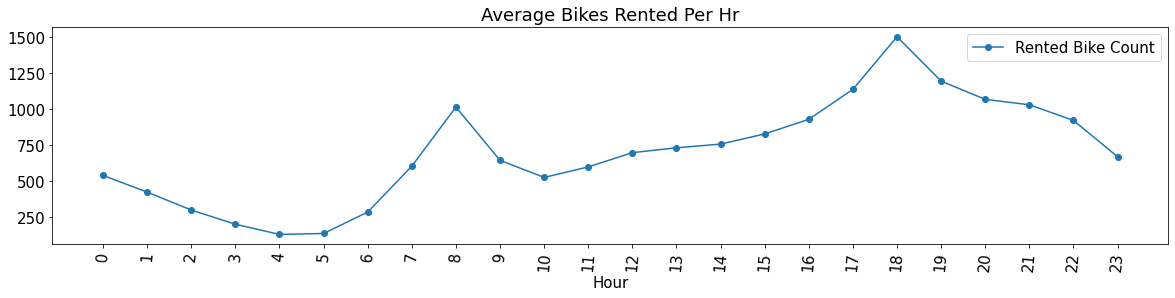

In [ ]:
#Ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);


High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour. we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand





In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [ ]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night
0,0,0,1,1,1,1
1,0,0,1,1,1,1
2,0,0,1,1,1,1
3,0,0,1,1,1,1
4,0,0,1,1,1,1
...,...,...,...,...,...,...
8755,0,0,0,1,1,0
8756,0,0,0,1,1,0
8757,0,0,0,1,1,1
8758,0,0,0,1,1,1


In [ ]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [ ]:
#showing head of final df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,label_day_night_Night,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,weekdays_weekend
0,0,0,1,1,1,1,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0
1,0,0,1,1,1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0
2,0,0,1,1,1,1,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0
3,0,0,1,1,1,1,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0
4,0,0,1,1,1,1,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0


In [ ]:
#describing final DF
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
label_day_night_Night,8760.0,0.333333,0.471431,0.0,0.00,0.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00


**Let's do a visualisation during the holidays**

It means that koreans rent bikes to go to school or work

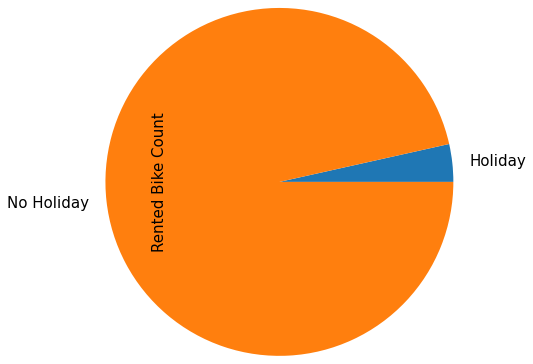

In [ ]:
bike_data.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=2)

**We see that holiday rent are very low so let's see on which period extends holidays**

The shape of this Df is 432 lines and 16 columns, it means that there are only 18 days of holidays in Korea which is very short. And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important

In [ ]:
dfHoliday=bike_data.loc[bike_data['Holiday'] == 'Holiday']

In [ ]:
dfHoliday.shape

(432, 15)

**Let's plot the rent of bikes following the state of the weather**

**We can see that even if it rains a lot of korean rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes**

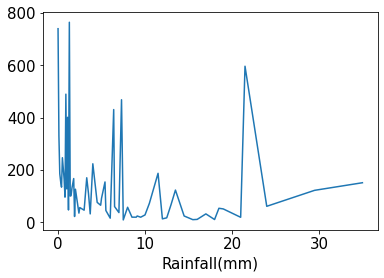

In [ ]:
bike_data.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

**This raise between 20 and 25 mm of rainfall seems very contradictory, so we decide to explain this**

We can see that these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important

In [ ]:
bike_data.loc[(bike_data['Rainfall(mm)']>20)&(bike_data['Rainfall(mm)']<25)]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,weekdays_weekend,label_day_night
5034,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,6,0,Day
5132,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,2,0,Day
6524,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,8,0,Day


**We can see on the y-axis, the amount of rents is very low**

When we have more than 4 cm of snow, the bike rents is much lower

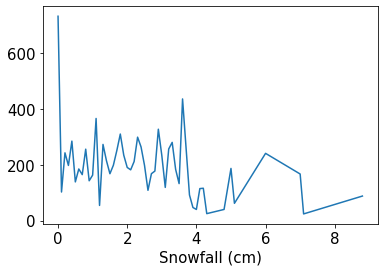

In [ ]:
bike_data.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

#Step 3- Data Modeling

We have to keep in mind that the most correlated features to the target are :


*   the solar radiation
*   the hour
*   the temperature
We have to drop some features that are not important to our target


**Let's import libraires needed in this modeling part**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Functions
Creating Function to train linear models and calculate scores

---



In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  
#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

**Creating function to run diffirent models**`

---



In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

**Creating function to get feature importance**

---



In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

**Lime tablular**

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 4.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0f1f861f29039c1c5a1667c185b2b684a72e1e57261b731f49c09c4d7bf31d21
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

#Train | Test Split for LR

In [ ]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
X.shape

(8760, 16)

In [ ]:
y=np.sqrt(final_df['Rented Bike Count'])

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#Mutiple Linear Regression
We tried to drop some of the features of the X_train_MultipleRegression to see if the score rised but it was not the case. So we kept the feature selection with the best score Furthermore, we don't scale data in Linear Regression, but if we did we would first have to split into train and test set

#Present all the results of every model in a data frame and plot these in function of the model

#Linear Regresseion

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 169799.43662979512
RMSE : 412.06727197120995
R2 : 0.5869965745329618
Adjusted R2 :  0.5839555921089064

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



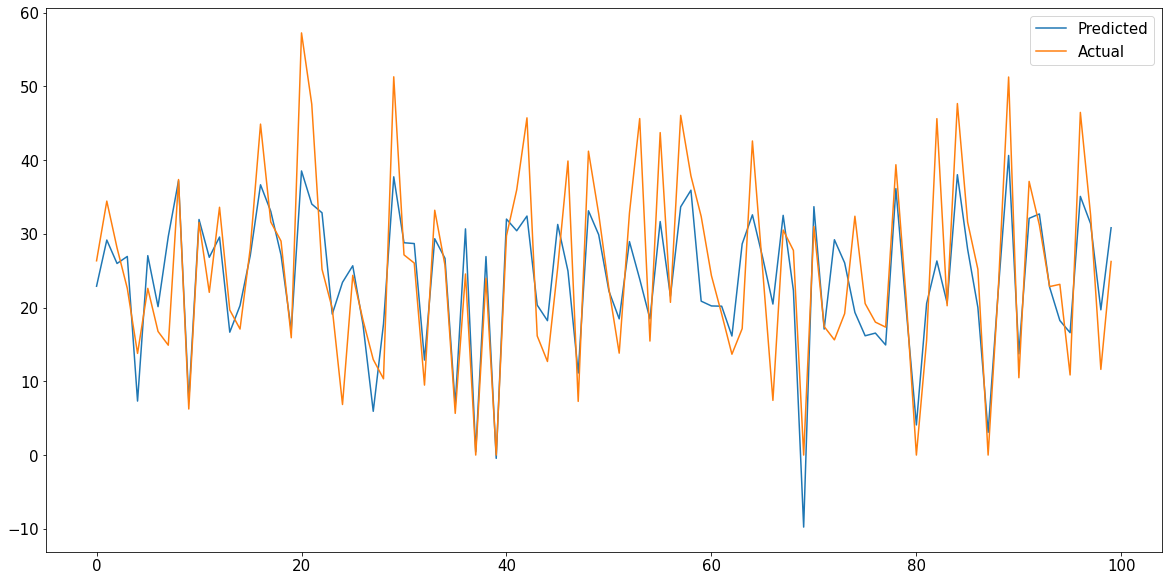

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 170100.95420242345
RMSE : 412.43296934462387
R2 : 0.5862631928869113
Adjusted R2 :  0.583216810505959

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



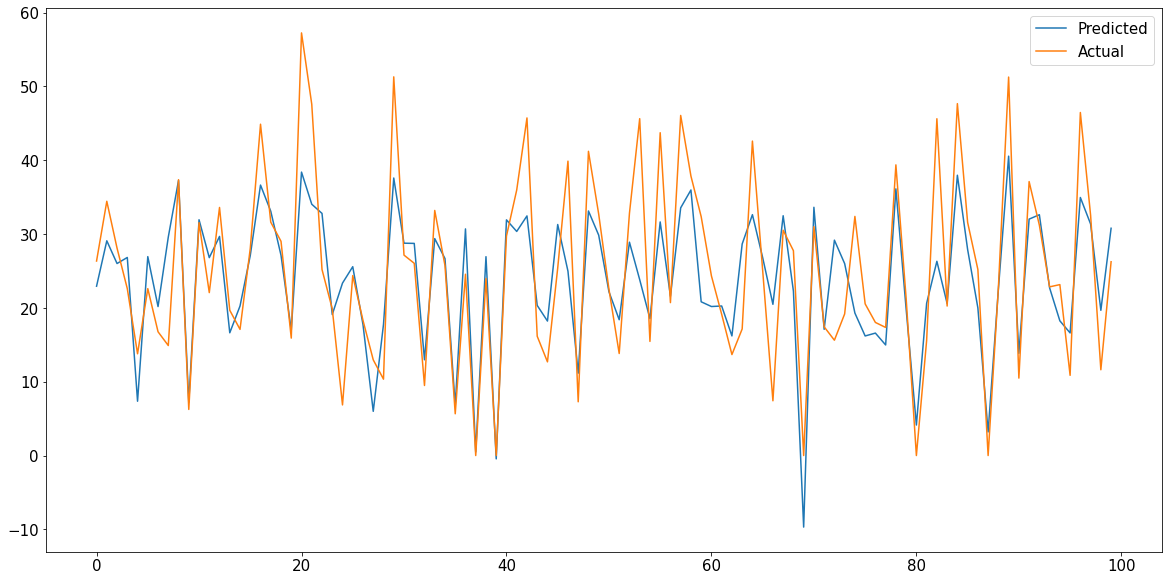

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 170089.76394195226
RMSE : 412.41940296493357
R2 : 0.5862904109743103
Adjusted R2 :  0.5832442290026532

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



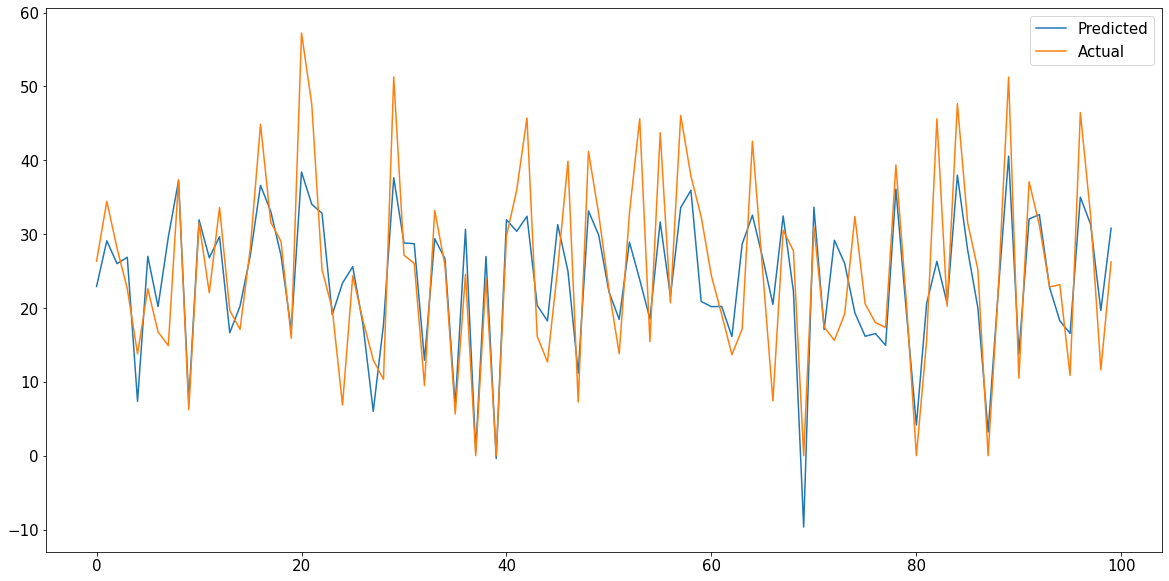

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

#ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 170431.9680587487
RMSE : 412.83406843276475
R2 : 0.5854580673855976
Adjusted R2 :  0.5824057567911058

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



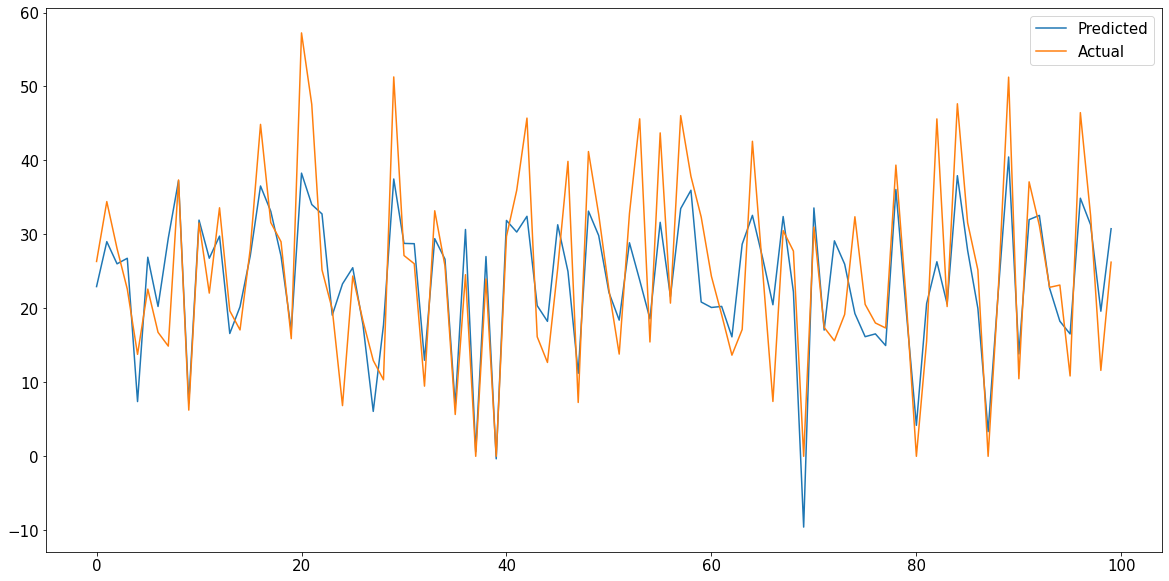

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

#Polynomial Regression

In [ ]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 106369.20394031961
RMSE : 326.1429195005153
R2 : 0.7412780250423674
Adjusted R2 :  0.7393730312092693

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



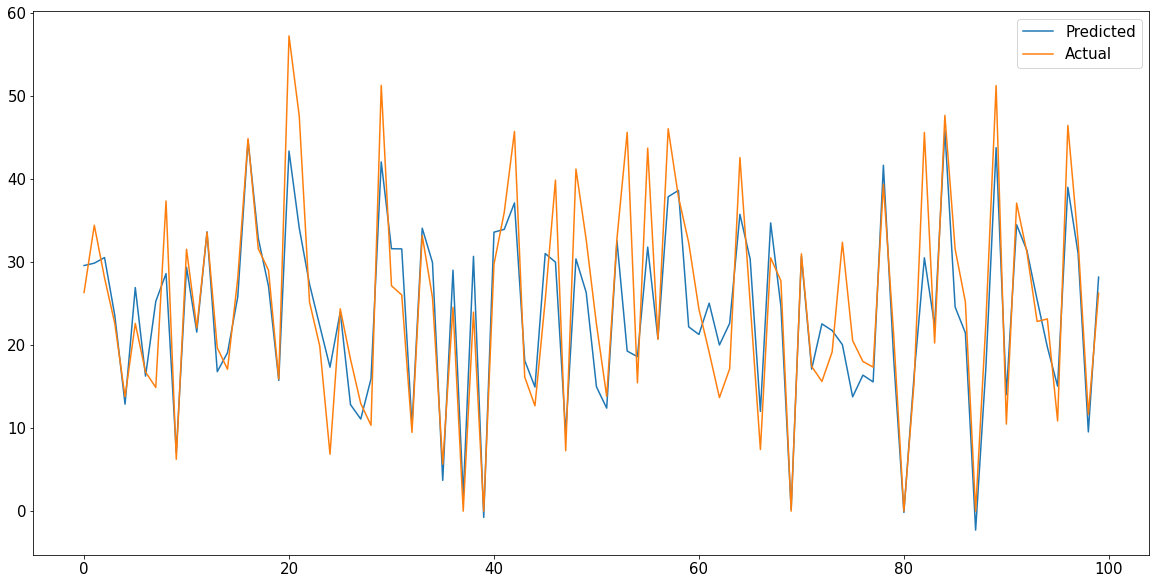

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

#KNN and Tree Based Method Train | Test split Data For Tree based method

---



In [ ]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#creating model
scaler = MinMaxScaler()

In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 88113.97219685439
RMSE : 296.83997742361856
R2 : 0.784668229511283
Adjusted R2 :  0.7830827217672336

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



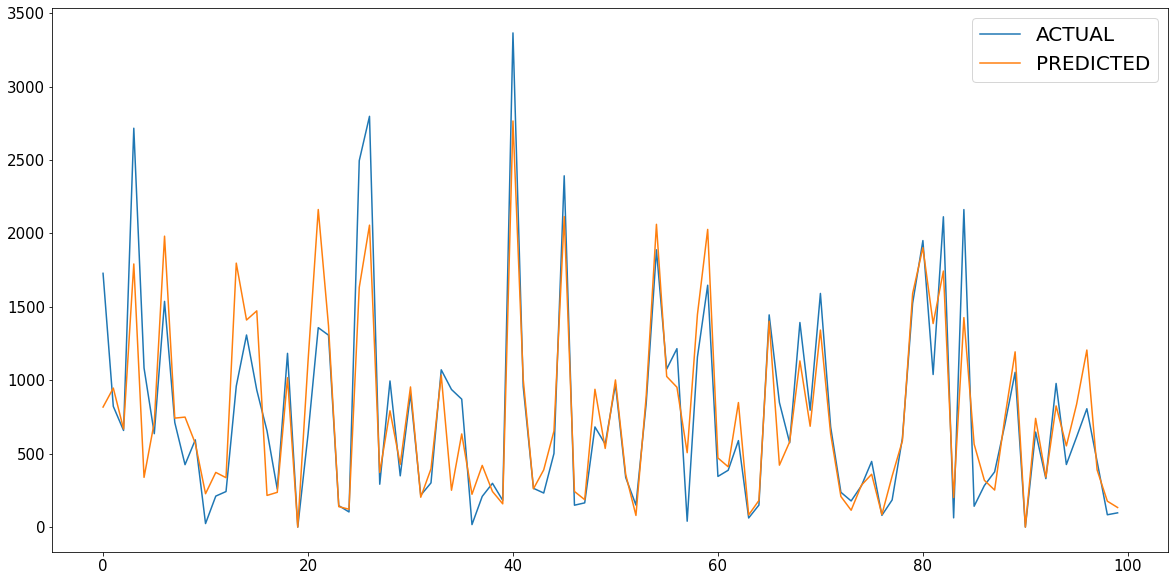

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

#Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 85397.12785388128
RMSE : 292.227869741887
R2 : 0.791307618111398
Adjusted R2 :  0.789770996799747

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



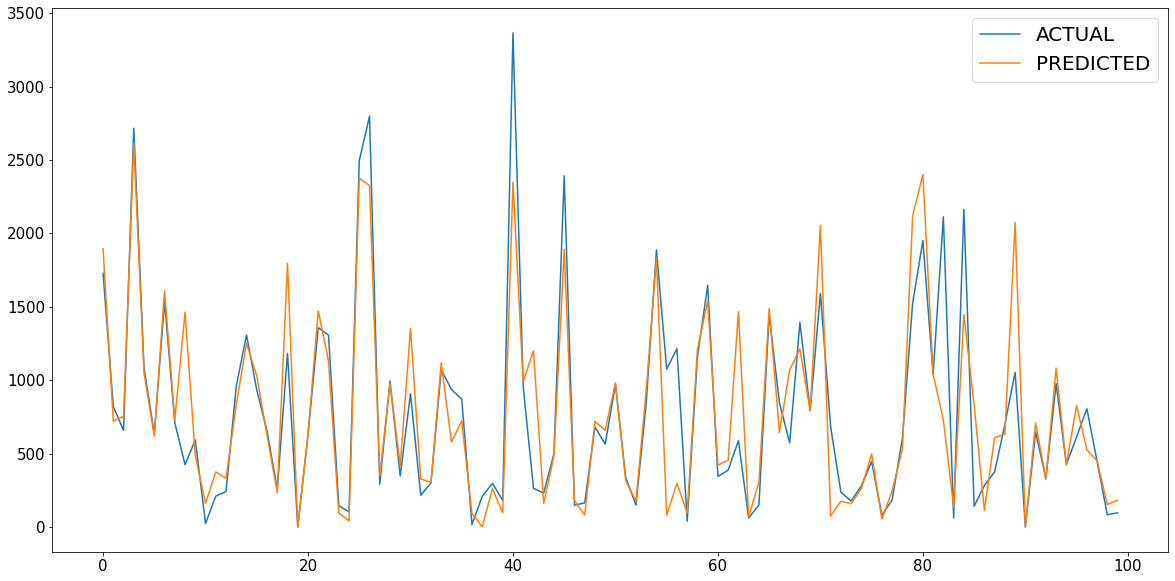

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

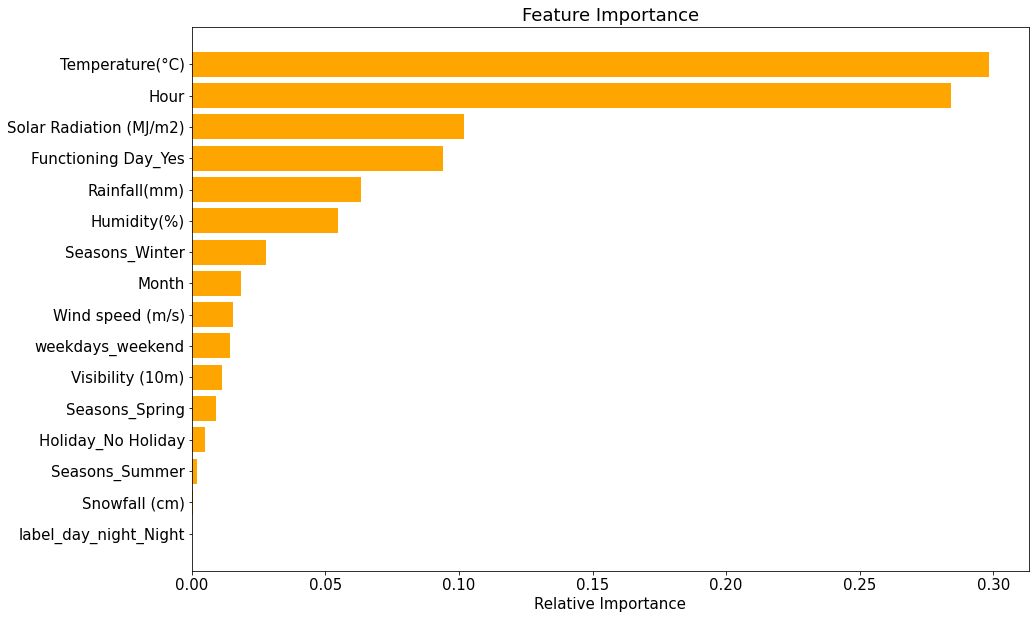

In [ ]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

#Random Forest

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 62262.26011816383
RMSE : 249.52406721229082
R2 : 0.847844304693009
Adjusted R2 :  0.8467239682342369

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



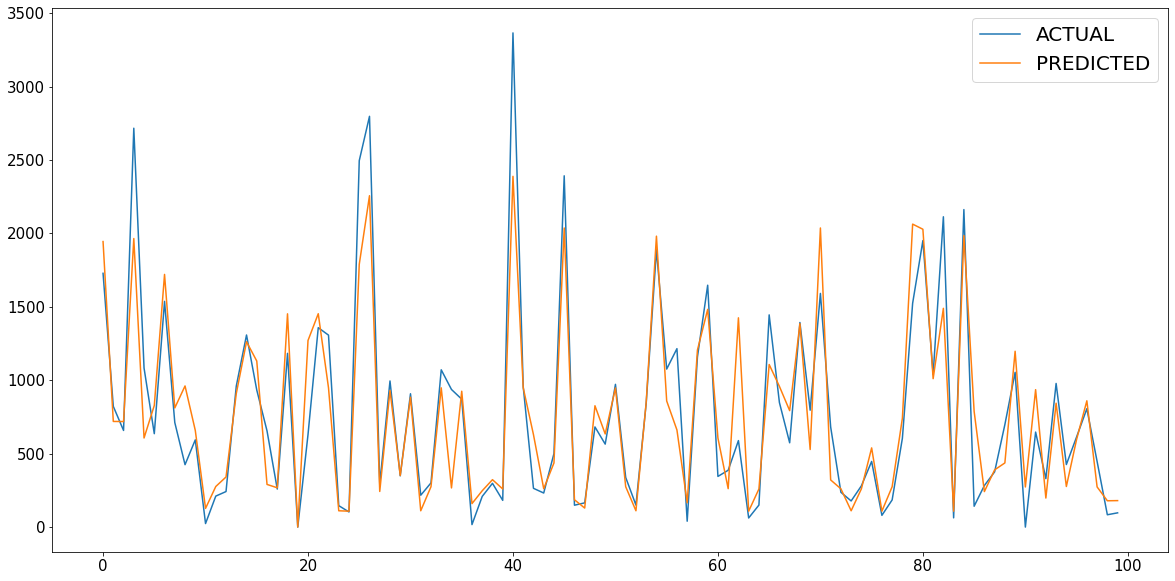

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

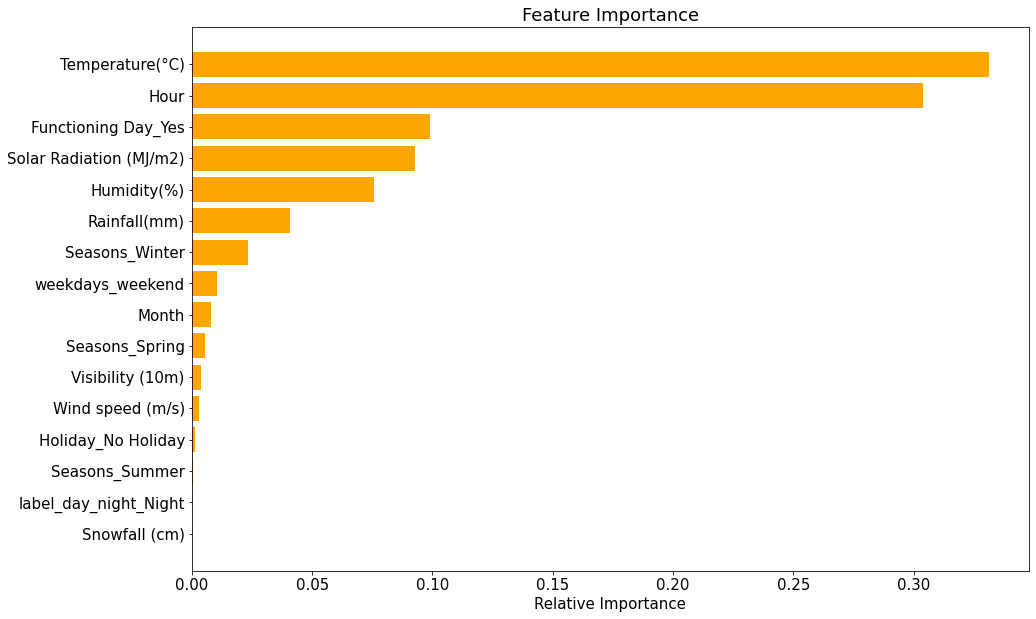

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

#Gradient Boosting

In [ ]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 57602.89880979981
RMSE : 240.00603911110196
R2 : 0.8592307907957484
Adjusted R2 :  0.8581942940873876

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



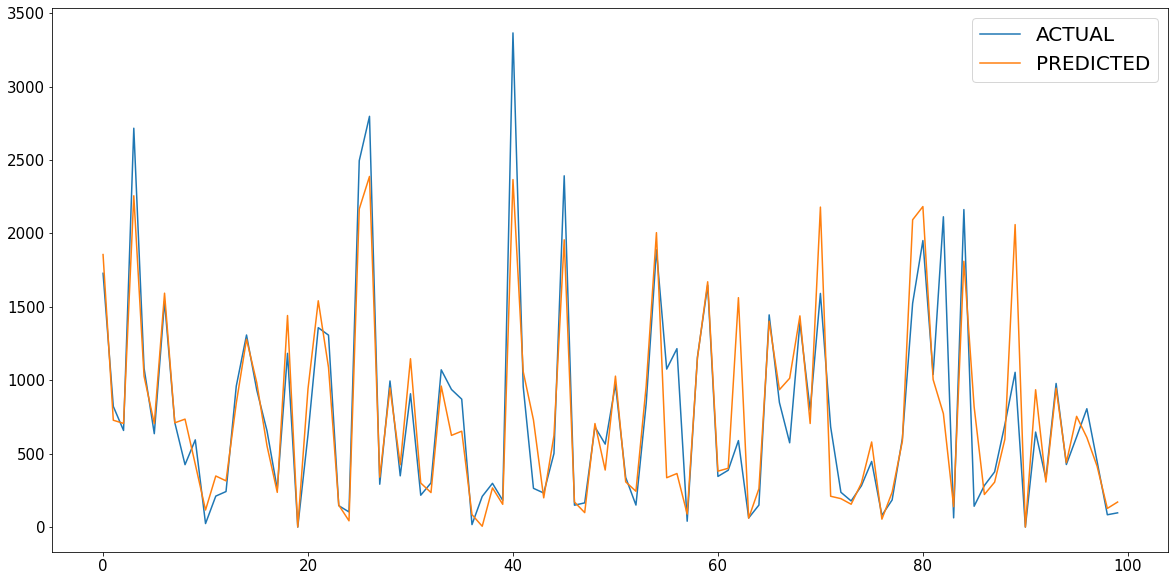

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

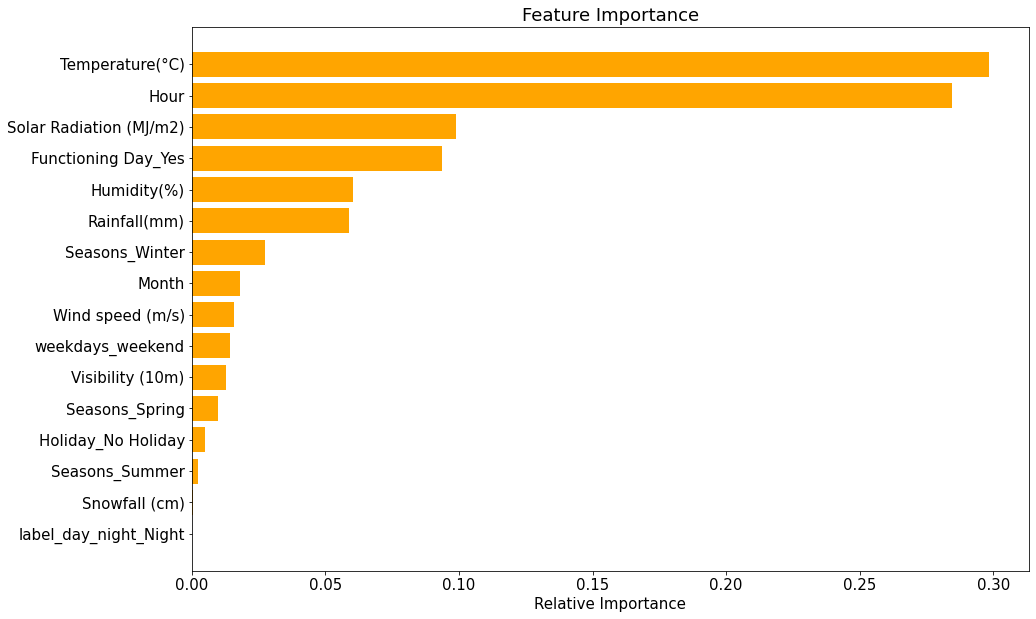

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

#eXtreme Gradient Boosting

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[21:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

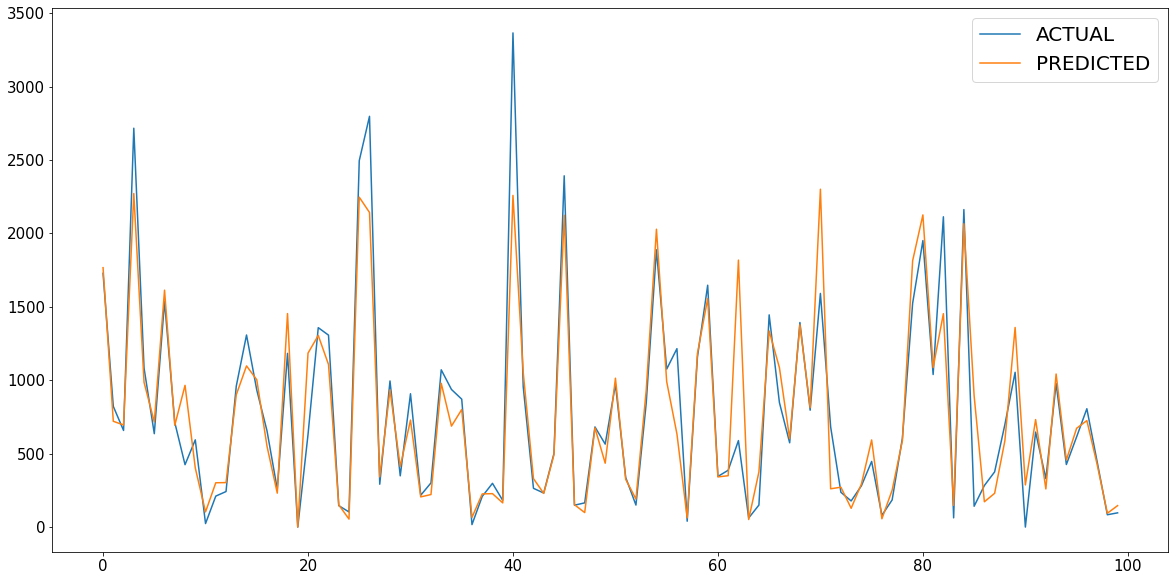

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [ ]:
#Best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

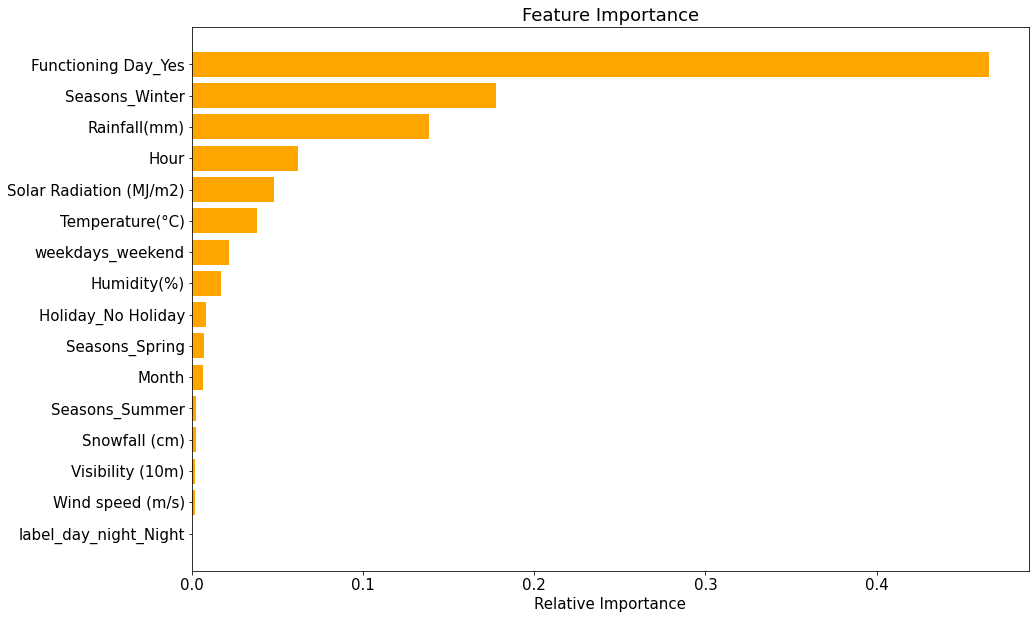

In [ ]:
#Best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

#CatBoost

In [ ]:
#Installing CatBoost
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
#Importing cat boost Regressor
from catboost import CatBoostRegressor

In [ ]:
# Creating CatBoost model
cb_model=CatBoostRegressor(verbose=0)


================Evalution Matrix=========================

MSE : 37602.80521009628
RMSE : 193.91442754497737
R2 : 0.9081067574261344
Adjusted R2 :  0.9074301389810439

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



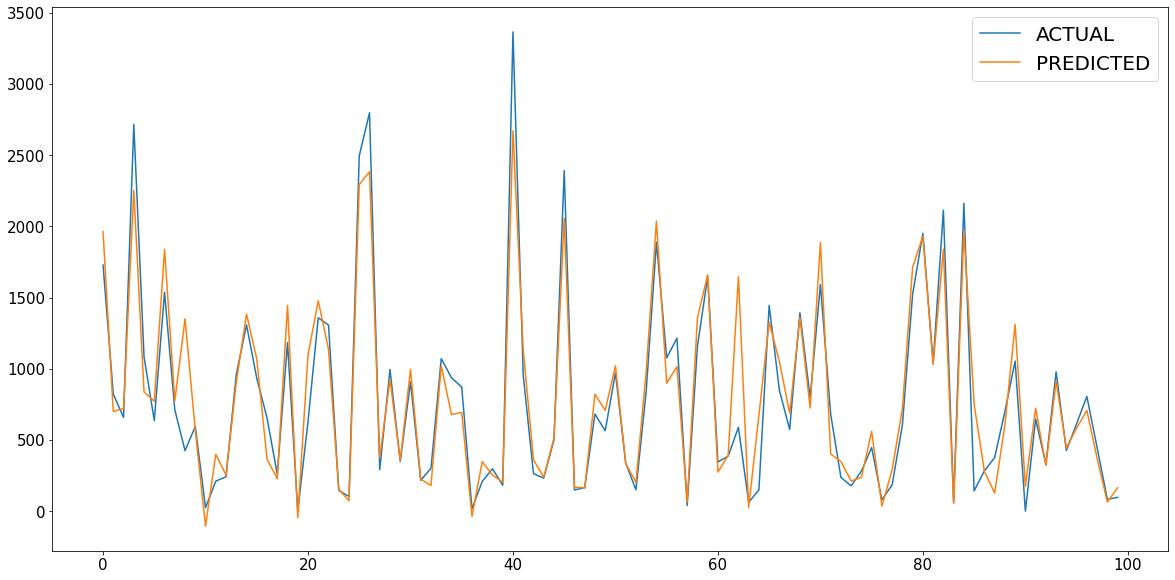

In [ ]:
#Calling run_model to Train-fit and evalution of CatBoost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [ ]:
#Checking params of CatBoost model
cb_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.05512600019574165,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fracti

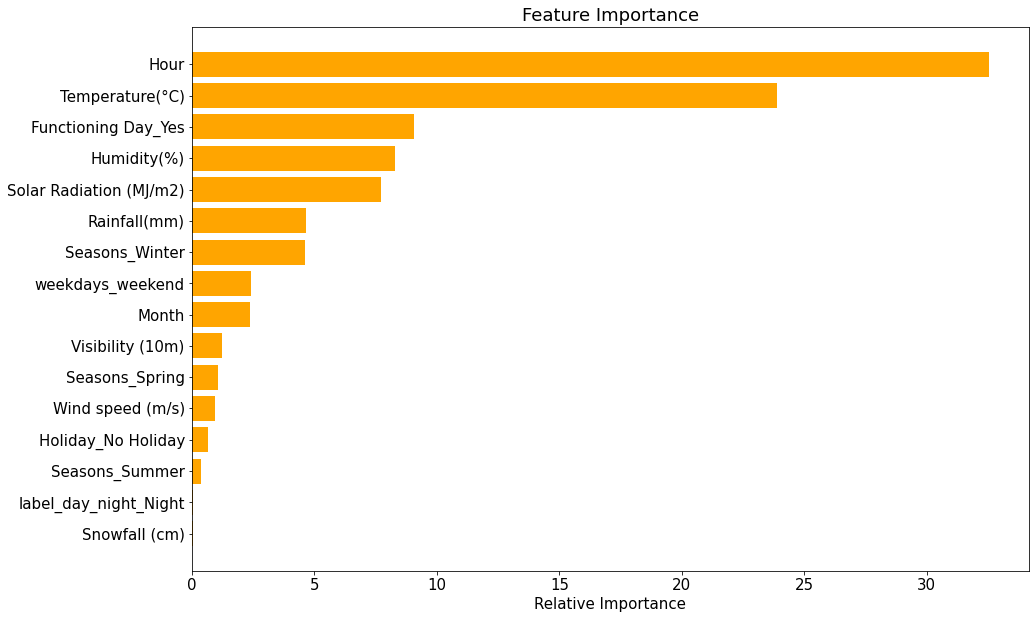

In [ ]:
#Getting and Visualizing features importance of CatBoost model
get_features_importance(cb_model,X_train)

#Combined Evaluation Matrix of All the models

In [ ]:
#Creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#List of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost']

In [ ]:
#Converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,K-Nearyest_Neighbor,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB,CATBoost
Mean_square_error,169799.436630,170100.954202,170089.763942,170431.968059,106369.203940,88113.972197,85397.127854,62262.260118,57602.898810,42737.715697,37602.805210
Root_Mean_square_error,412.067272,412.432969,412.419403,412.834068,326.142920,296.839977,292.227870,249.524067,240.006039,206.731023,193.914428
R2,0.586997,0.586263,0.586290,0.585458,0.741278,0.784668,0.791308,0.847844,0.859231,0.895558,0.908107
Adjusted_R2,0.583956,0.583217,0.583244,0.582406,0.739373,0.783083,0.789771,0.846724,0.858194,0.894789,0.907430


In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,169799.436630,412.067272,0.586997,0.583956
1,Lasso,170100.954202,412.432969,0.586263,0.583217
2,Ridge,170089.763942,412.419403,0.586290,0.583244
3,Elasticnet,170431.968059,412.834068,0.585458,0.582406
4,Polynomial,106369.203940,326.142920,0.741278,0.739373
5,K-Nearyest_Neighbor,88113.972197,296.839977,0.784668,0.783083
6,Decision_Tree,85397.127854,292.227870,0.791308,0.789771
7,Random_Forest,62262.260118,249.524067,0.847844,0.846724
8,Gradient_Boosting,57602.898810,240.006039,0.859231,0.858194
9,Xtreme_GB,42737.715697,206.731023,0.895558,0.894789


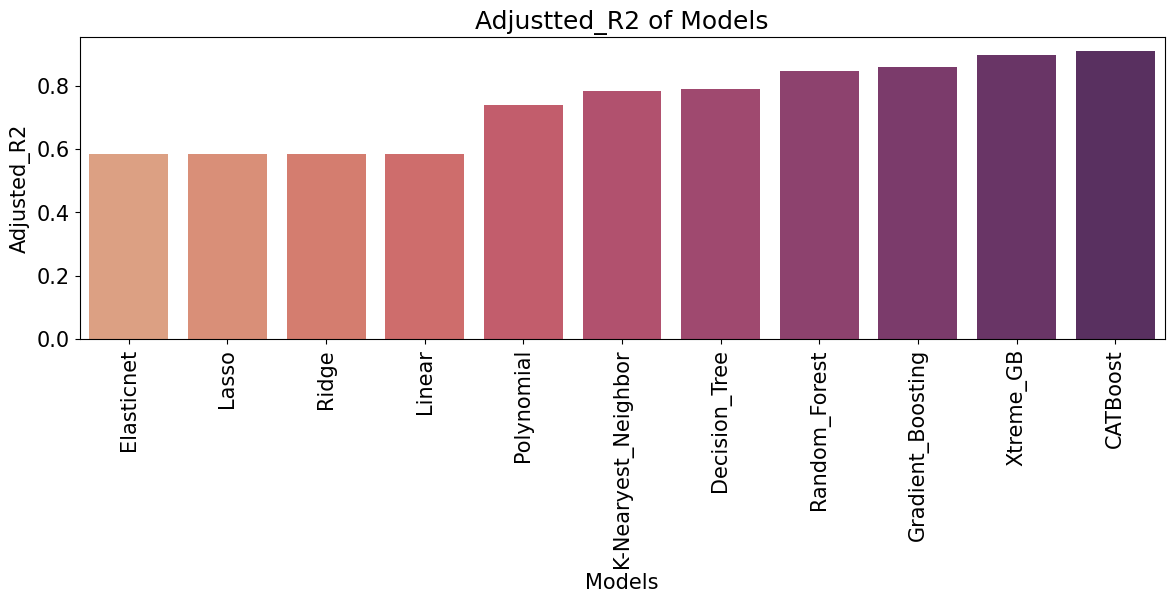

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

#Model Explainibility

#SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 4.2 MB/s 


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [ ]:
for_instance=2

In [ ]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#ELI5

In [ ]:
pip install eli5

     |████████████████████████████████| 106 kB 4.5 MB/s 


In [ ]:
import eli5 as eli

In [ ]:
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

In [ ]:
#eli5 for xgboost model 
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.

#Final Conclusion:

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After performing the various models the Catboost  model found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Catboost models !

9.We can use Catboost model for the bike rental stations.